##Credit Card Fraud Detection
Industry: Finance
Description: Develop a system to detect fraudulent credit card transactions in real-time using transaction data.
Instructions:
1.Load the dataset and explore features like transaction amount, time, and anonymized variables.
2.Handle class imbalance (fraud cases are rare) using techniques like SMOTE or undersampling.
3.Train a model (e.g., Logistic Regression, XGBoost, or Autoencoder) to classify transactions as fraud or legitimate.
4.Evaluate using ROC-AUC and confusion matrix.
5.Simulate real-time detection with a subset of test data.
Dataset: Credit Card Fraud Detection Dataset (Kaggle)
Tools: Python, Scikit-learn, Imbalanced-learn, TensorFlow

In [1]:
!pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import time
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay,classification_report

In [3]:
file = zipfile.ZipFile('archive (10).zip', 'r')
file.extractall()
file.close()

EDA

In [4]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("(rows, columns) = ", df.shape)
print("Content information \n", df.isna().sum())
df.dtypes

(rows, columns) =  (284807, 31)
Content information 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
fraud=df[df['Class']==1]
print(f'FRAUD {fraud}')
valid=df[df['Class']==0]
print(f'VALID {valid}')

FRAUD             Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8       

In [8]:
fraud.Time.describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [11]:
df.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [12]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

In [13]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
#oversampling
os=SMOTE(random_state=1)
X_os,Y_os=os.fit_resample(X,Y)
print(f"THE VALUES COUNTS AFTER OVERSAMPLING:\n{pd.Series(Y_os).value_counts()}")
#undersampling
us=RandomUnderSampler(random_state=1)
X_us,Y_us=us.fit_resample(X,Y)
print(f"THE VALUES COUNTS AFTER UNDERSAMPLING:\n{pd.Series(Y_us).value_counts()}")

THE VALUES COUNTS AFTER OVERSAMPLING:
0    284315
1    284315
Name: count, dtype: int64
THE VALUES COUNTS AFTER UNDERSAMPLING:
0    492
1    492
Name: count, dtype: int64


In [15]:
X_otrain,X_otest,T_otrain,T_otest=train_test_split(X_os,Y_os,test_size=0.3,random_state=18)
X_utrain,X_utest,T_utrain,T_utest=train_test_split(X_us,Y_us,test_size=0.3,random_state=18)

**LOGISTIC REGRESSION**

SPLIT AND TRAIN ON OVERSAMPLED AND UNDERSAMPLED DATA

In [16]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_otrain,T_otrain)
modelu = LogisticRegression(max_iter=100)
modelu.fit(X_utrain,T_utrain)

LogisticRegression()

PREDICTION ON OVERSAMPLED DATA

In [17]:
y_opred = modelo.predict(X_otest)
y_opred_proba = modelo.predict_proba(X_otest)[:, 1]

ROC-AUC Score: 0.9952989581750704
Confusion Matrix:
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     85210
           1       0.98      0.97      0.97     85379

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



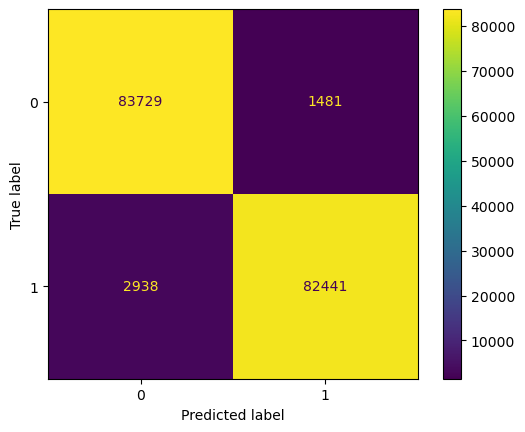

In [43]:
print("ROC-AUC Score:", roc_auc_score(T_otest, y_opred_proba))
print("Confusion Matrix:\n", ConfusionMatrixDisplay.from_predictions(T_otest, y_opred))
print("Classification Report:\n", classification_report(T_otest, y_opred))

PREDICTION ON UNDERSAMPLED DATA

In [19]:
y_upred = modelu.predict(X_utest)
y_upred_proba = modelu.predict_proba(X_utest)[:, 1]

ROC-AUC Score: 0.9783055492121489
Confusion Matrix:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       145
           1       0.99      0.89      0.94       151

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



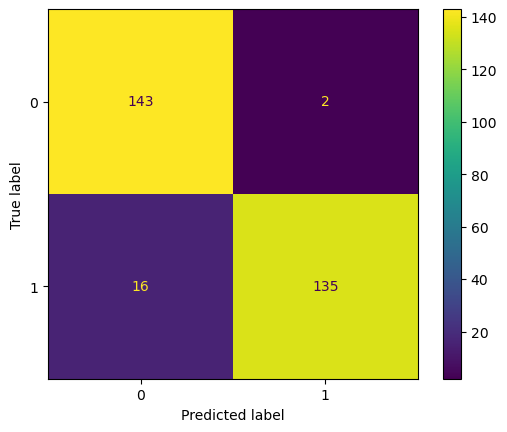

In [44]:
print("ROC-AUC Score:", roc_auc_score(T_utest, y_upred_proba))
print("Confusion Matrix:\n", ConfusionMatrixDisplay.from_predictions(T_utest, y_upred))
print("Classification Report:\n", classification_report(T_utest, y_upred))

**XGBOOST CLASSIFIER**

In [16]:
scalar=StandardScaler()
scalar.fit(X_os)
x=scalar.transform(X_os)
'''scalar=MinMaxScaler()
scalar.fit(X_os)
x=scalar.transform(X_os)'''

'scalar=MinMaxScaler()\nscalar.fit(X_os)\nx=scalar.transform(X_os)'

In [17]:
scalar=MinMaxScaler()
scalar.fit(X_os)
x=scalar.transform(X_os)

In [22]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_otrain, T_otrain)

C:\Users\parva\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:30:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [31]:
y_pred = model.predict(X_otest)
y_proba = model.predict_proba(X_otest)[:, 1]

ROC-AUC Score: 0.9999966479704014
Confusion Matrix:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85210
           1       1.00      1.00      1.00     85379

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



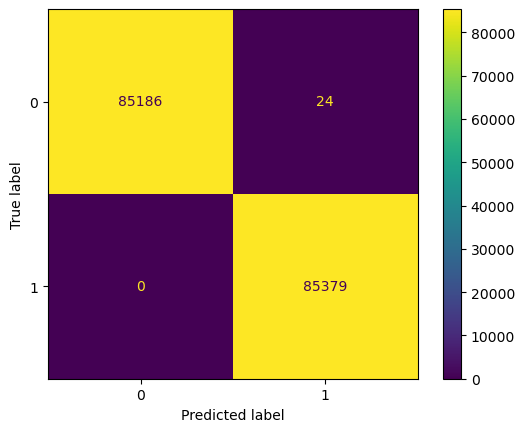

In [45]:
roc_auc=roc_auc_score(T_otest, y_proba)
print("ROC-AUC Score:", roc_auc_score(T_otest, y_proba))
print("Confusion Matrix:\n", ConfusionMatrixDisplay.from_predictions(T_otest, y_pred))
print("Classification Report:\n", classification_report(T_otest, y_pred))

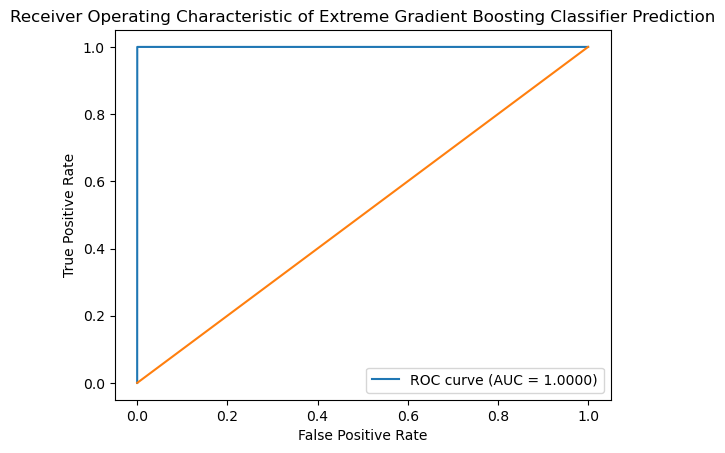

In [33]:
fpr, tpr, _=roc_curve(T_otest, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Extreme Gradient Boosting Classifier Prediction')
plt.legend(loc="lower right")
plt.show()

In [41]:
print("\n--- Real-Time Fraud Detection Simulation ---")
n=int(input("Enter the number of data from test data that should be tested ..."))
X_otest = pd.DataFrame(X_otest)
for i in range(n):  # simulate with 5 random transactions
    inform = X_otest.iloc[[i]]
    prediction = model.predict(inform)[0]
    probability = model.predict_proba(inform)[0][1]
    label = "FRAUD" if prediction == 1 else "LEGITIMATE"
    print(f"Transaction {i+1}: Prediction -> {label}, Probability of Fraud -> {probability:.4f}")
    time.sleep(1)  


--- Real-Time Fraud Detection Simulation ---
Enter the number of data from test data that should be tested ...5
Transaction 1: Prediction -> FRAUD, Probability of Fraud -> 1.0000
Transaction 2: Prediction -> LEGITIMATE, Probability of Fraud -> 0.0001
Transaction 3: Prediction -> FRAUD, Probability of Fraud -> 1.0000
Transaction 4: Prediction -> LEGITIMATE, Probability of Fraud -> 0.0000
Transaction 5: Prediction -> LEGITIMATE, Probability of Fraud -> 0.0000
